##### Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

##### Load the data

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

##### Scale the data

In [6]:
x_train = x_train / 255
x_test = x_test / 255

##### Build the model

In [9]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3),
                activation='relu'))
# First Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Second Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(3,3),  activation='relu'))
# Second Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 256)              

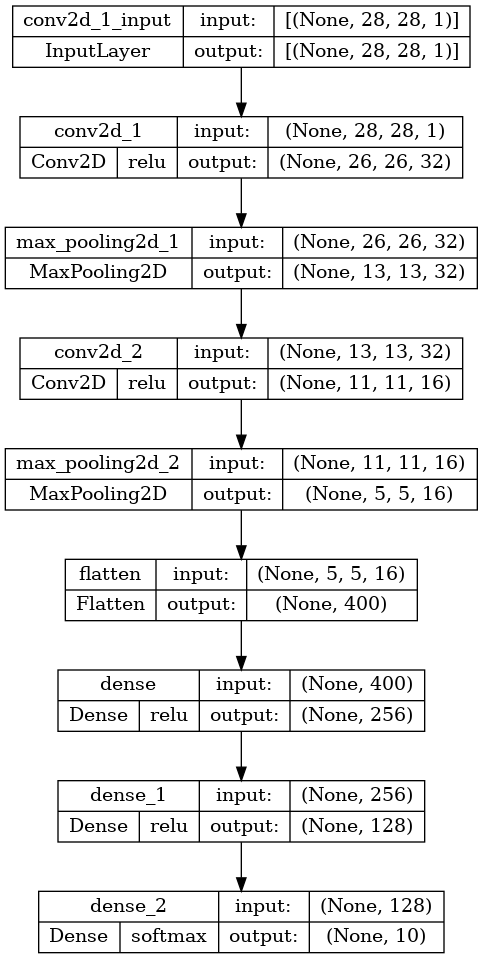

In [11]:
plot_model(model, show_layer_activations=True, show_layer_names=True,
          show_shapes=True)

##### Compile the model

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

##### Train the model

In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.1197 - accuracy: 0.9633
Epoch 2/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0492 - accuracy: 0.9855
Epoch 3/10
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 4/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0285 - accuracy: 0.9916
Epoch 5/10
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 6/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 7/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0177 - accuracy: 0.9948
Epoch 8/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0171 - accuracy: 0.9951
Epoch 9/10
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0142 - accuracy: 0.9957
Epoch 10/10
6000/6000 [==============================] - 22s 4ms/step - l

##### Evaluate on test set

In [17]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 13s 1ms/step - loss: 0.0483 - accuracy: 0.9910


[0.04826168343424797, 0.9909999966621399]

##### Predict on new image

In [19]:
import cv2

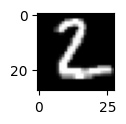

In [30]:
img = cv2.imread('new-char.png',0)
img = cv2.resize(img,(28,28))
plt.figure(figsize=(1,1))
plt.imshow(img, cmap='gray')

In [31]:
img = img / 255
img = img.reshape(1,28,28)
result = model.predict(img)
np.argmax(result)

1/1 [==============================] - 0s 16ms/step


2